# 利用Seaborn进行数据可视化

[介绍](http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)

* Seaborn是一种基于matplotlib的图形可视化python libraty。提供了一种高度交互式界面，是matplotlib作图库的有效补充，而不是替代物
* 安装方法：pip install seaborn

# 全量数据作图

## 数据概览

In [2]:
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
anscombe_df = sns.load_dataset('anscombe')

In [4]:
anscombe_df.groupby('dataset').agg([np.mean, np.var])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

## 计算相关性

In [5]:
a=[]
for i in list(set(anscombe_df.dataset)):
    b=anscombe_df[anscombe_df.dataset==i].corr()
    a.append(b.iloc[1,0])

print a

[0.81642051634484003, 0.81623650600024278, 0.81628673948959807, 0.81652143688850276]


**备注：**
* 如果只看统计变量，四类数据的均值，方差和相关性是一致的，那是不是说明四类数据分布就一样呢？
* 以下通过作图直观展示四类数据的分布

## lmplot画图

In [6]:
# 设置样式
sns.set_style("white")

样式控制，共5个seaborn主题，适用于不同的应用和人群偏好：

* darkgrid ：黑色网格，默认
* whitegrid ： 白色网格
* dark：黑色背景
* white：白色背景
* ticks：

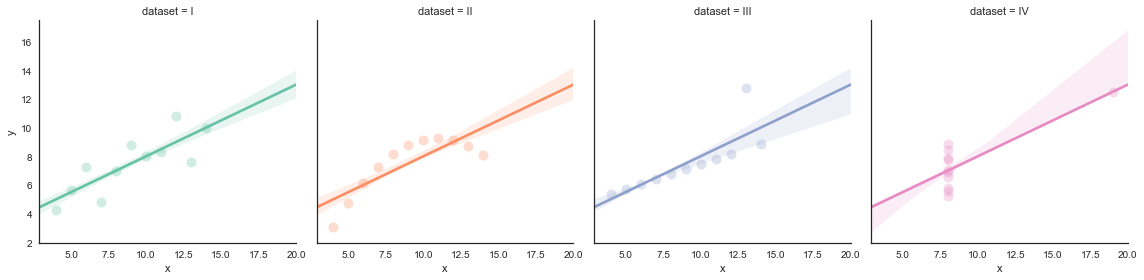

In [7]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", 
           data=anscombe_df, col_wrap=4, ci=50, palette="Set2",
           size=4, scatter_kws={"s": 100, "alpha": 0.3})

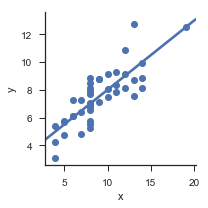

In [8]:
sns.set_style("ticks")
sns.lmplot(x="x", y="y", 
           data=anscombe_df,  ci=None, palette="muted",
           size=3, scatter_kws={"s": 50, "alpha": 1})

In [9]:
# load 吸烟与否数据集
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


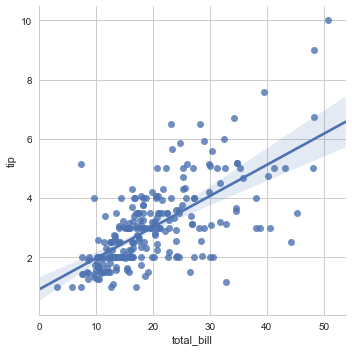

In [46]:
# 直观上绘制出total_bill和tip的线性关系
sns.lmplot(x="total_bill",y="tip",data=tips)

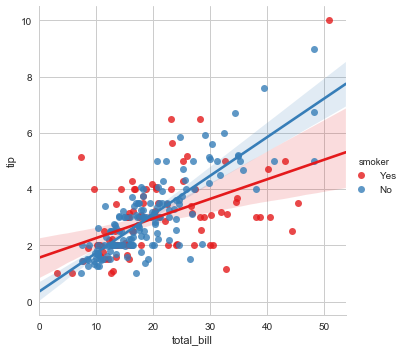

In [57]:
sns.set_style("whitegrid")
#研究小费tips与总消费金额total_bill在吸烟与不吸烟人之间的关系
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips , palette="Set1")

通过回归模型发现total_bill=20为分界点，不吸烟者的小费高于吸烟者

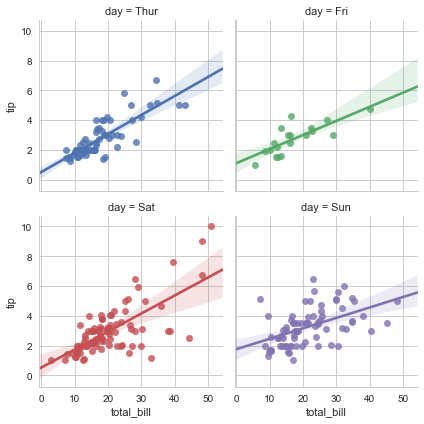

In [11]:
#研究在不同星期下，消费总额与消费的回归关系，col|hue控制子图不同的变量day，col_wrap控制每行子图数量，size控制子图高度
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",data=tips, col_wrap=2, size=3)

## regplot 绘图

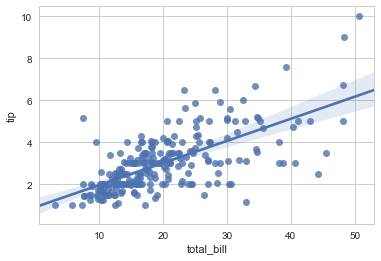

In [45]:
# 同lmplot()一样，首先绘制出total_bill和tips的线性关系
sns.regplot(x="total_bill",y="tip",data=tips,fit_reg=True,x_jitter=0.2)

lmplot()绘图和regplot()绘图的主要区别是：
* 参数区别：data参数时lmplot()必传的参数之一，而regplot可以通过data['x']和data['y']的形式传入x，y和data
* 当其中一个变量取值为离散型的时候，可以拟合一个线性回归。然而，这种数据集生成的简单散点图通常不是最优的，一个常用的方法是为离散值添加一些随机噪声的“抖动”(x_jitter)。抖动仅适用于散点图数据，且不会影响拟合的回归线本身

# [利用FacetGrid作图](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

如果想在数据集的不同子集上绘制相同绘图的多个实例，比如不同性别抽烟人群在小费和消费金额的关系。即在数据集的子集内可视化变量的分布或多个变量之间的关系时该如何操作呢？

* 可以考虑用FacetGrid子集绘图，FacetGrid可以绘制最多三个维度：row，col和hue。
* 前两者与所得轴数有明显的对应关系;将hue变量视为沿着深度轴的第三维，其中不同的级别用不同的颜色绘制

In [12]:
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

## 不同种类图形绘制

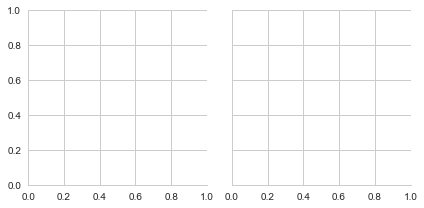

In [13]:
# 初始化网格，并没有绘制任何图像
g=sns.FacetGrid(tips,col="time")

### 直方图 hist

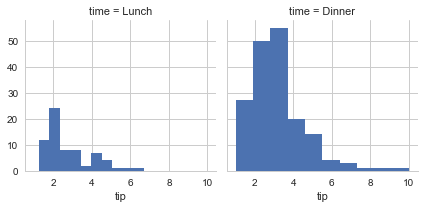

In [16]:
# 在上述网格上可视化数据的主要方法是FacetGrid.map()函数
g=sns.FacetGrid(tips,col="time")
g.map(plt.hist,"tip")

将数据集tips按照time分成两个子集，然后分别绘制两个子集上tips的直方图

### 散点图 scatter

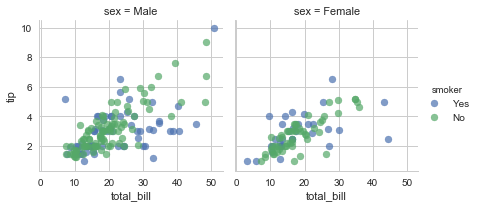

In [18]:
g=sns.FacetGrid(tips,col="sex",hue="smoker")
g.map(plt.scatter,"total_bill","tip",alpha=0.7)
g.add_legend()

将数据集tips按照性别分成两个子集，在绘制total_bill和tips散点图关系的时候，再按照吸烟与否将散点图颜色进行区分

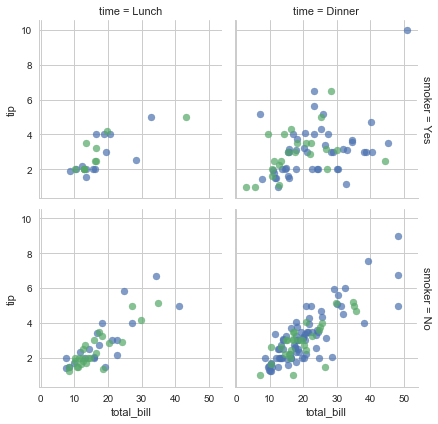

In [35]:
g=sns.FacetGrid(tips,row="smoker",col="time",hue="sex",margin_titles=True)
g.map(plt.scatter,"total_bill","tip",alpha=0.7)

将数据集tips按照time和smoker分成四个子集，然后再绘制total_bill和tip散点图的关系

### 盒子图 barplot

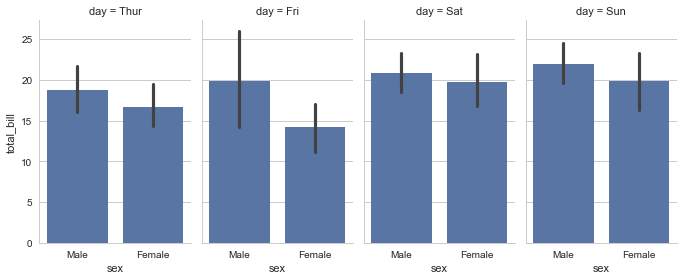

In [72]:
# 参数size和aspect控制图像的大小
g=sns.FacetGrid(tips,col="day",size=4,aspect=0.6)
g.map(sns.barplot,"sex","total_bill")

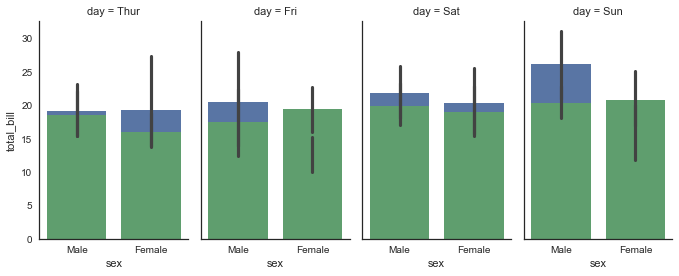

In [89]:
# FacetGrid中设置hue参数进行数据区分
g=sns.FacetGrid(tips,col="day",size=4,aspect=0.6,hue="smoker")
g.map(sns.barplot,"sex","total_bill")

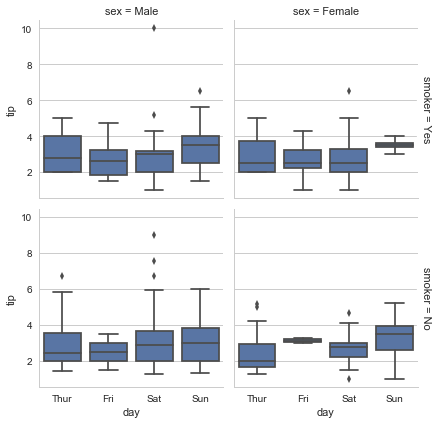

In [77]:
g = sns.FacetGrid(tips, col="sex", row="smoker",margin_titles=True)
g.map(sns.boxplot, "day", "tip");

### 频率直方图 [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

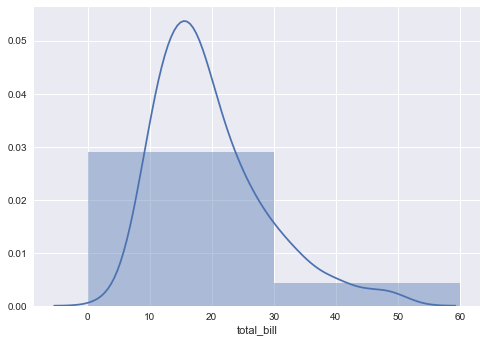

In [132]:
# distplot() 绘制频率直方图
# bins 设置频率
sns.distplot(tips['total_bill'],bins=[0,30,60])

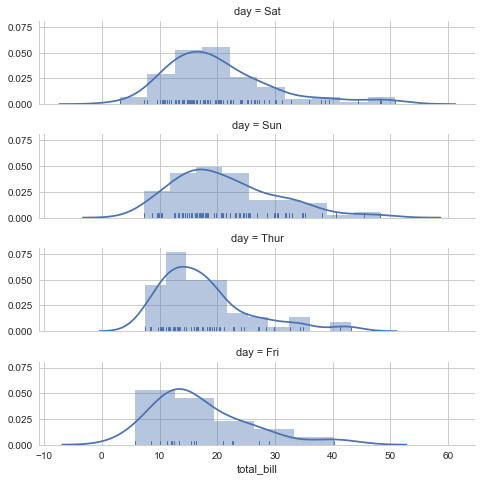

In [80]:
# 寻找适当的*_order参数来指定任何平面维度的数据顺序。
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=True, rug=True);

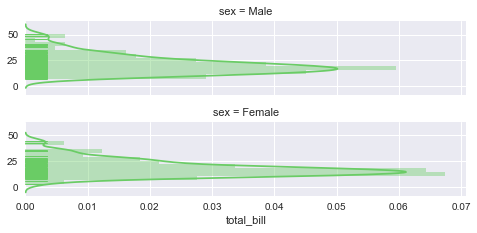

In [127]:
# 寻找适当的*_order参数来指定任何平面维度的数据顺序。
ordered_days = tips.sex.value_counts().index
g = sns.FacetGrid(tips, row="sex", row_order=ordered_days,
                  size=1.7, aspect=4,)

# vertical 用来指定图像的方向
# color 用来设置颜色，如k，y，g等
g.map(sns.distplot, "total_bill", hist=True, rug=True,vertical=True,color="g");

### 柱状图 countplot

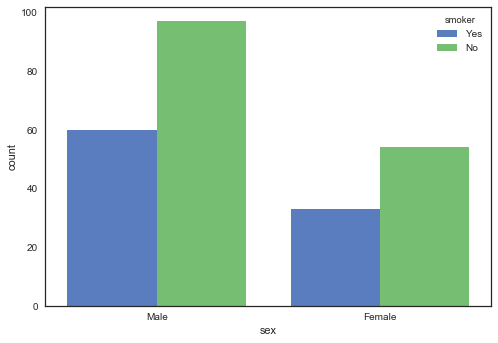

In [84]:
# 按照性别绘制出吸烟和不吸烟的人数
# 设置x，竖着排列
sns.countplot(x="sex", hue="smoker", data=tips)

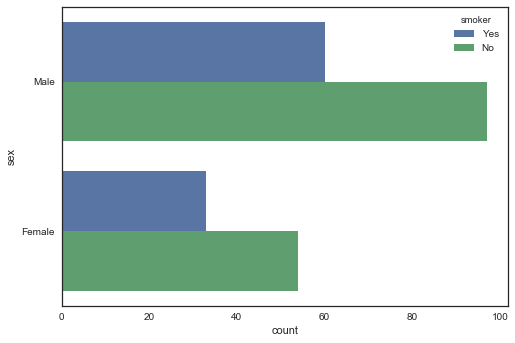

In [87]:
# 设置y，横着排列
sns.countplot(y='sex',data=tips,hue='smoker')

### 折线图 pointplot

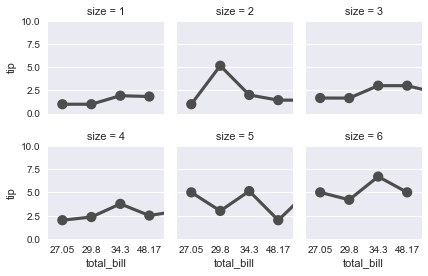

In [152]:
# col_wrap：一行摆几张图
# col：每个size绘制一张图，类似于col
# 最终绘制出total_bill和tip在不同size下的散点关系
g = sns.FacetGrid(tips, col="size", col_wrap=3, size=2, ylim=(0, 10))
g.map(sns.pointplot, "total_bill", "tip", color=".3", ci=None);

### 自定义绘图类型

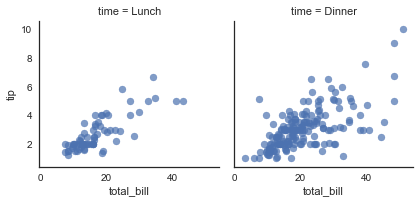

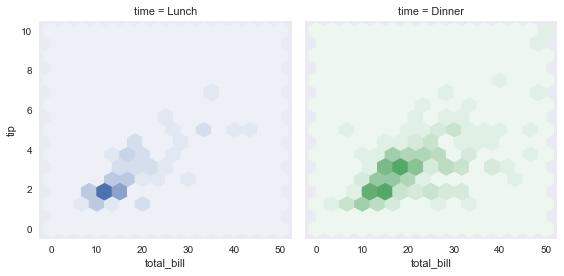

In [179]:
# 比如绘制不同time下total_bill和tip的散点关系
# 直接绘图的问题在于散点堆积在一起，不易看出类似于频率一样的效果，如何改善呢，可以使用sns.light_palette()函数绘制
g=sns.FacetGrid(tips,col="time",margin_titles=True)
g.map(plt.scatter,"total_bill","tip",alpha=0.7)

# 自定义hexbin函数
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)

g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## 调整绘图细节

使用FacetGrid.map()（可以多次调用）绘制图形之后，可能需要调整绘图的某些方面。 FacetGrid对象上还有一些方法可以在更高层次的抽象上操作图形。最通用的是FacetGrid.set()，还有其他更专门的方法，如FacetGrid.set_axis_labels()，它遵循内部方面没有轴标签的效果。

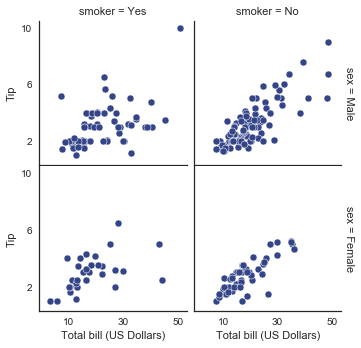

In [162]:
sns.set_style('white')
g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);

# 设置坐标轴X和Y的名称
g.set_axis_labels("Total bill (US Dollars)", "Tip");

#  设置X和Y坐标轴的范围
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.05, hspace=.01);

## 调色板

可以提供任何Seaborn调色板（即可以传递给color_palette()的参数），还可以使用将色调变量中值的名称映射到有效的matplotlib颜色的字典：

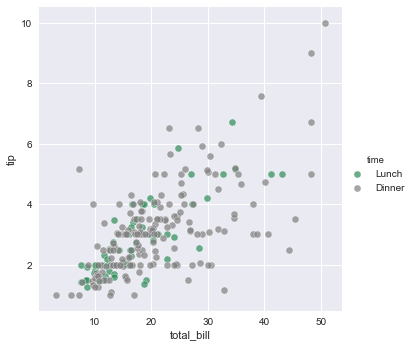

In [133]:
# pal是字典类型
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
# 添加图例
g.add_legend();

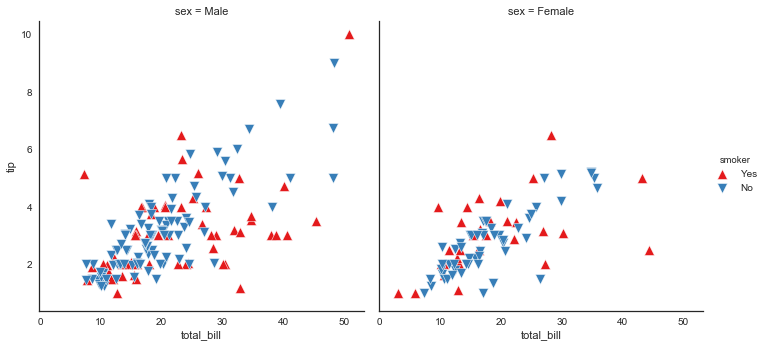

In [180]:
# 按照性别分成两个图，按照是否抽样在每个图中绘制不同的颜色，再利用hui_kws使不同颜色具有不同的形状
g = sns.FacetGrid(tips, col="sex",hue="smoker", palette="Set1",size=5 ,hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

# 利用PairGrid作图

* 散点图矩阵：使用相同的绘图类型快速绘制小子图的网格，以在每个图形中显示数据数据集中的每个成对关系。
* 重点区分FacetGrid()和PairGrid()之间的区别
  * FacetGrid()绘图重点在于展示某个变量与其他变量不同级别**相同的关系**
  * PairGrid()每个图都可以显示**不同的关系**
  * **用法**：类似于FacetGrid()，首先初始化网格，然后将绘图参数传递给map函数

In [181]:
# 下载iris数据集
iris=sns.load_dataset("iris")

## 常规绘图

### 对角线scatter()

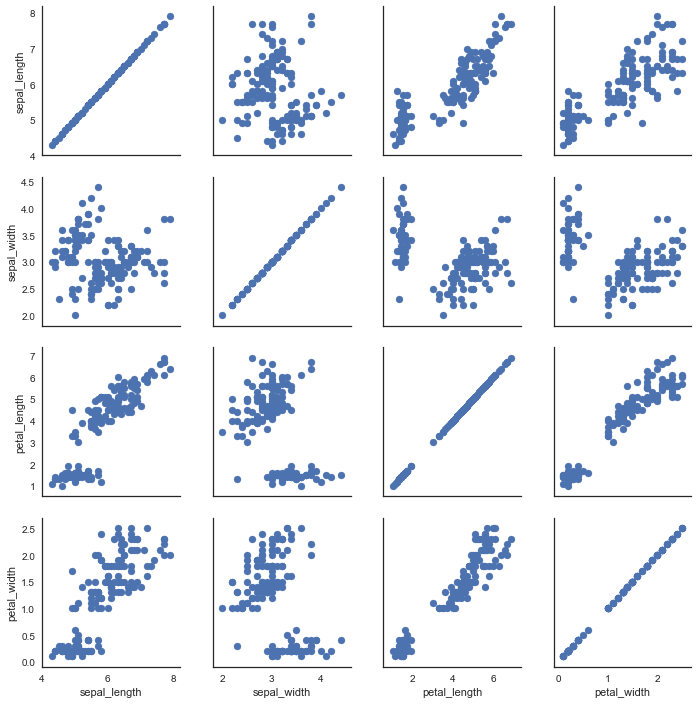

In [185]:
# 初始化网格
g=sns.PairGrid(iris)
# 将绘图函数传递给map函数
g.map(plt.scatter)

### 对角线hist()
展示每列中变量的单变量分布

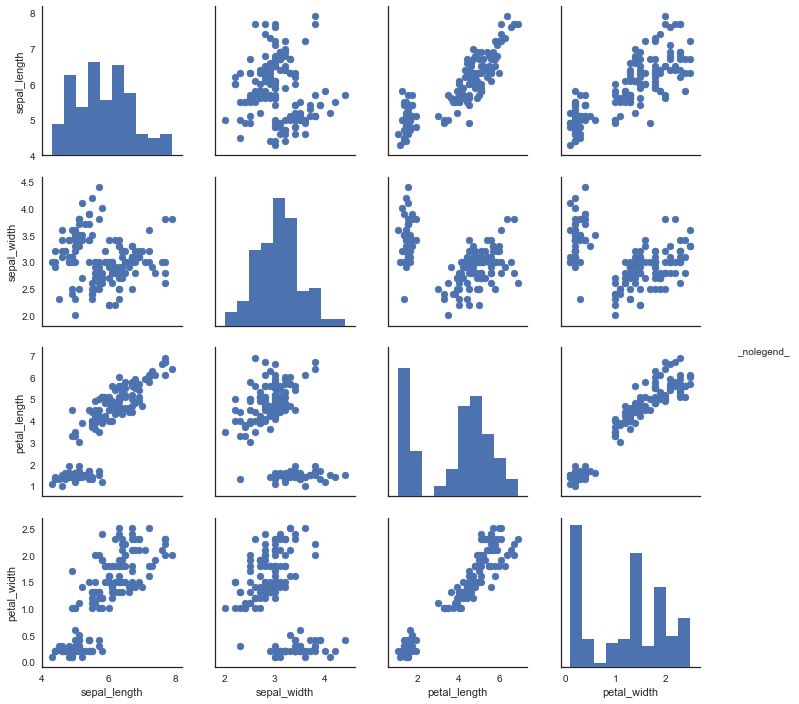

In [187]:
g=sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### 对角线堆积图hist()
通过单独的分类变量来绘制观察值

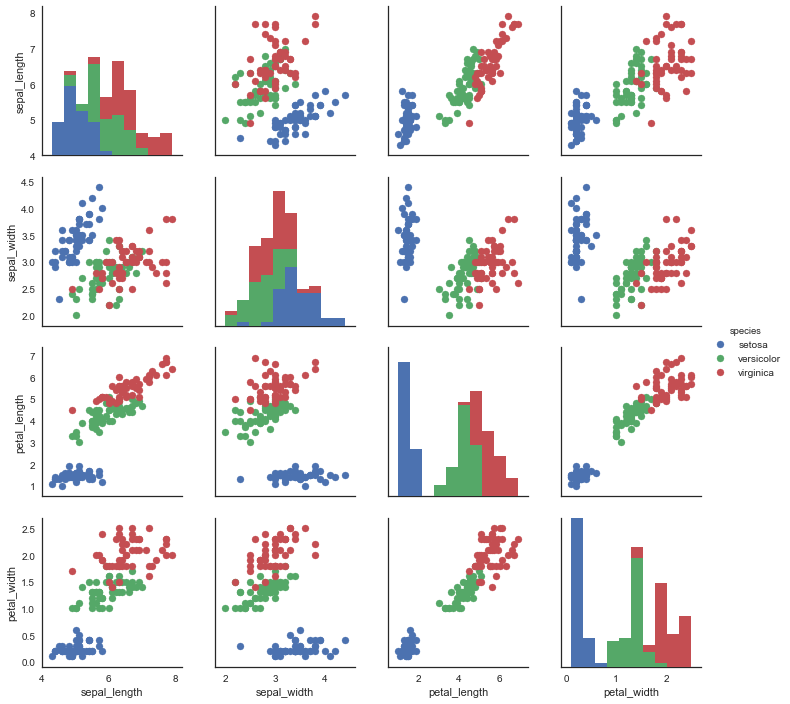

In [191]:
# 按照列名species进行区分类别
g=sns.PairGrid(iris,hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

## 特殊绘图

默认情况下，使用数据集中的每个数字列，但如果需要，您可以专注于特定的关系。

### 子集绘图

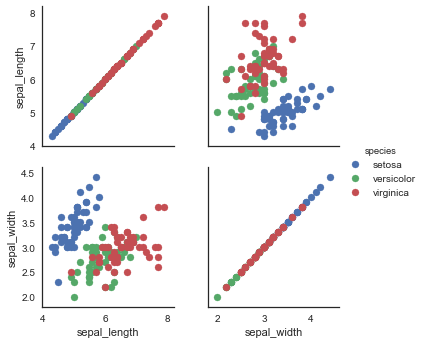

In [193]:
g=sns.PairGrid(iris,vars=['sepal_length','sepal_width'],hue='species')
g.map(plt.scatter)
g.add_legend()

### 上下三角使用不同类型图形

在上下三角形中使用不同的功能来强调关系的不同方面。

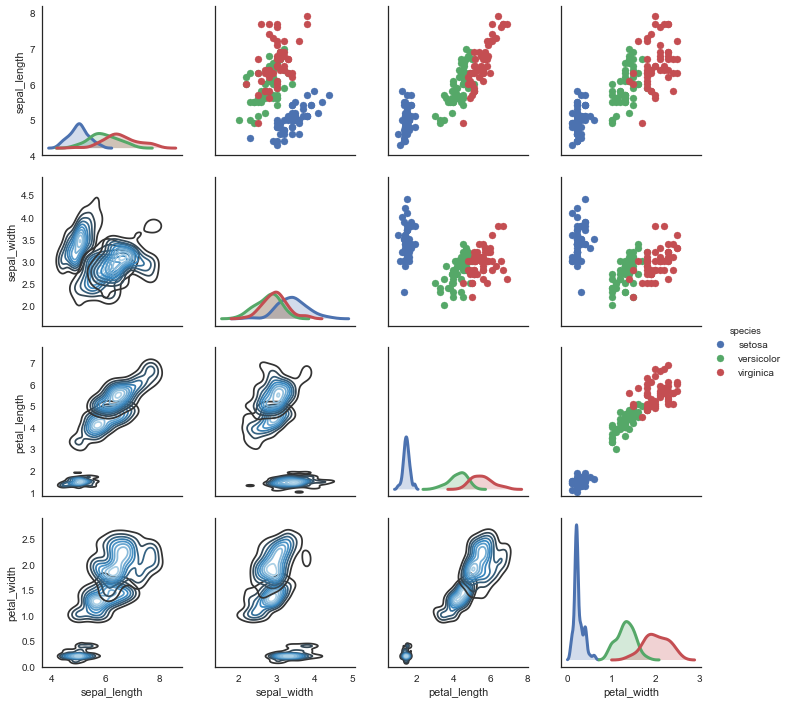

In [213]:
g=sns.PairGrid(iris,hue='species')
g.map_upper(plt.scatter)

# kdeplot：高斯概率密度图，对直方图的一种核密度估计方法
# http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
# 下三角展示二维的高斯函数
g.map_lower(sns.kdeplot,cmap="Blues_d")

# 对角线为一维高斯函数，展示数据的正态分布特性
g.map_diag(sns.kdeplot,lw=3,legend=False,shade=True)

g.add_legend()

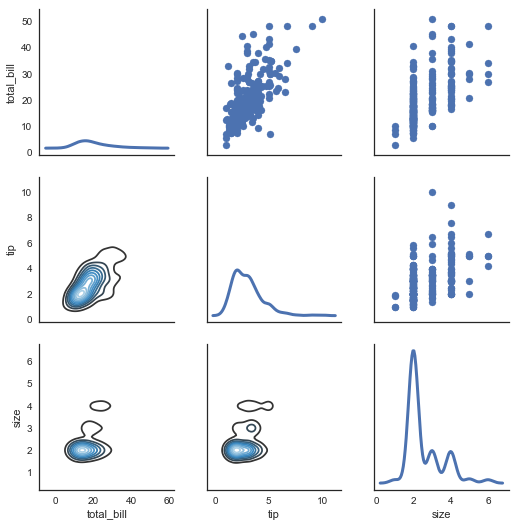

In [216]:
g=sns.PairGrid(tips)
g.map_upper(plt.scatter)

# kdeplot：高斯概率密度图，对直方图的一种核密度估计方法
# 区别于直方图，参考#http://blog.renren.com/share/247613541/15455888167 
# http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
# 下三角展示二维的高斯函数
g.map_lower(sns.kdeplot,cmap="Blues_d")

# 对角线为一维高斯函数，展示数据的正态分布特性
g.map_diag(sns.kdeplot,lw=3,legend=False)


### 行列不同变量

具有对角线上的身份关系的方形网格实际上只是一个特殊情况，您可以在行和列中绘制不同的变量。

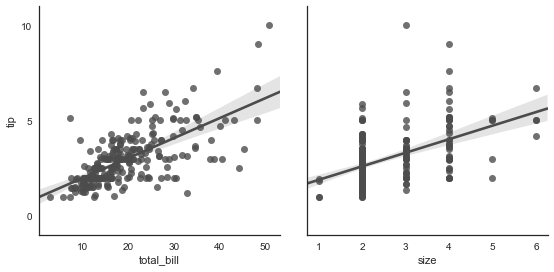

In [201]:
# y_vars可以是一个list，同时x_vars也可以是一个list
g=sns.PairGrid(tips,y_vars=["tip"],x_vars=["total_bill","size"],size=4)
g.map(sns.regplot,color=".3")
g.set(ylim=(-1,11),yticks=[0,5,10])

### 特殊属性配置
sns属性是可配置的。 例如，可以使用不同的调色板（例如，显示色调变量的顺序），并将关键字参数传递到绘图函数中。

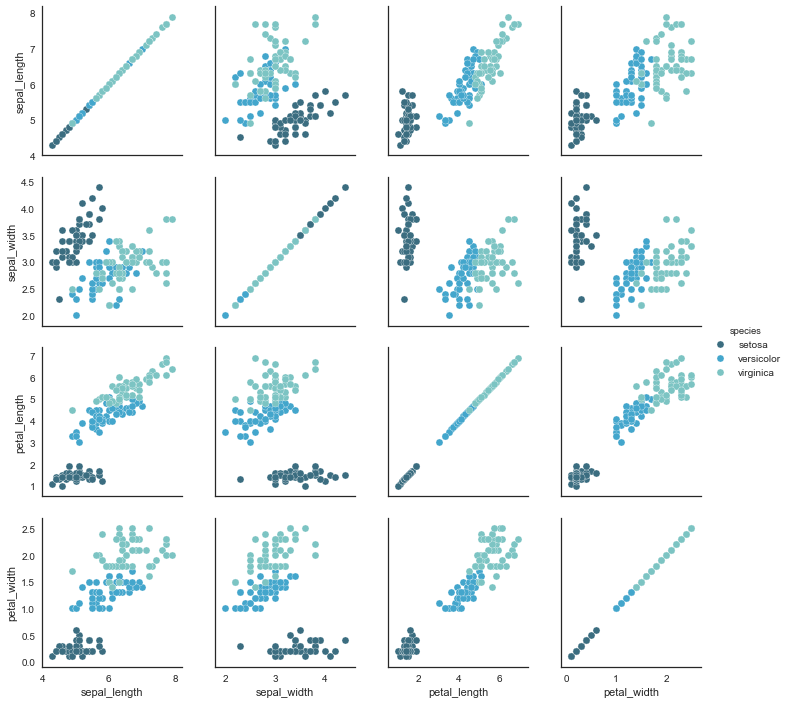

In [206]:
g=sns.PairGrid(iris,hue="species",palette="GnBu_d")
g.map(plt.scatter,s=50,edgecolor="white")
g.add_legend()

## 快速绘制
PairGrid是灵活的，但是要快速查看一个数据集，可以使用pairplot()更容易。 

* 默认情况下，该功能使用散点图和直方图，但是还可以添加其他几种（目前还可以绘制对角线上的对角线和KDEs的回归图）。
* 还可以使用关键字参数(diag_kid)控制显示细节，并返回PairGrid实例进行进一步的调整。如图二

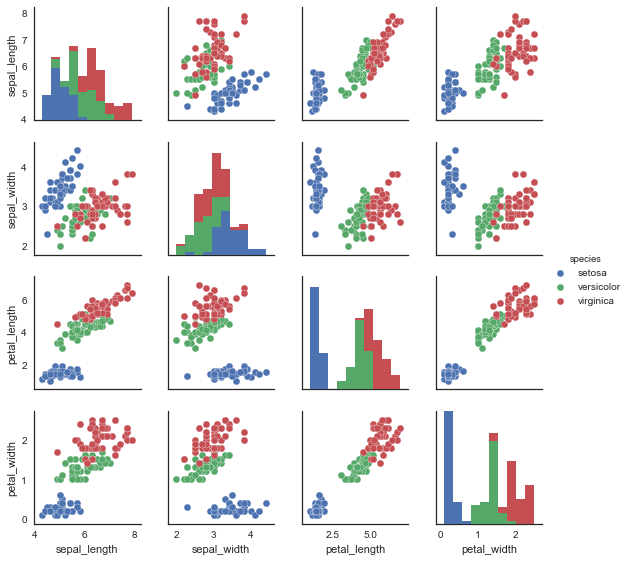

In [207]:
sns.pairplot(iris,hue="species",size=2.0)

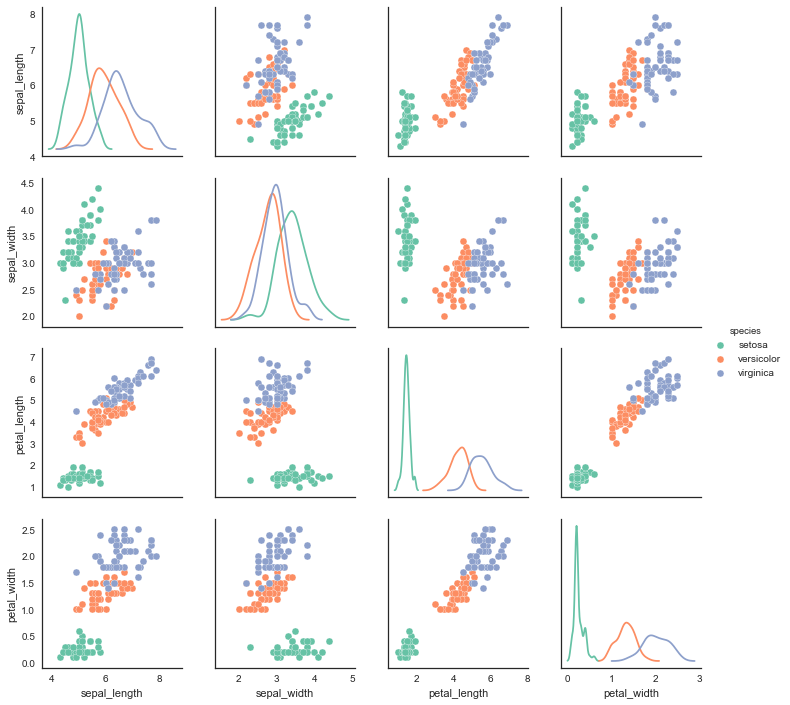

In [208]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)